<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con vecinos cercanos (KNN)

Ejemplo de clasificación utilizando vecinos cercanos para la clasificación de frutas según su peso y tamaño<br>

v2.0

### Objetivos: 
*   Preprocesar los datos (descarga, lectura, limplieza y filtrado).
*   Conocer como funciona el algoritmo clasificación con KNN (KNeighborsClassifier).
*   Evaluar el resultado el algoritmo clasificación con KNN (KNeighborsClassifier).

**KNN:** Clasificador que implementa el voto de k-vecinos más cercanos.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1]:
#Librerias a implementar
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### Código de descarga del dataset

In [2]:
if os.access('frutas.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/frutas.csv > frutas.csv
    else:
        !wget frutas.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/frutas.csv

--2023-03-09 00:30:57--  http://frutas.csv/
Resolving frutas.csv (frutas.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘frutas.csv’
--2023-03-09 00:30:57--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/frutas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1758 (1.7K) [text/plain]
Saving to: ‘frutas.csv’

frutas.csv          100%[===================>]   1.72K  --.-KB/s    in 0s      

2023-03-09 00:30:57 (36.9 MB/s) - ‘frutas.csv’ saved [1758/1758]

FINISHED --2023-03-09 00:30:57--
Total wall clock time: 0.2s
Downloaded: 1 files, 1.7K in 0s (36.9 MB/s)


### `fruta.csv`:
El dataset **`fruta.csv`** contiene diferentes tipos de frutas las cuales podremos clasificar en tres categorías según su peso y tamaño. Este dataset se creó a partir de:<br> [Dataset source](https://www.kaggle.com/datasets/mjamilmoughal/fruits-with-colors-dataset)

- **peso** --> peso en gramos
- **ancho** --> ancho en cm
- **alto** --> alto en cm


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Una vez descargado el archivo en Colab.
# Leerlo con Pandas y el método read_csv
# Una vez extraida toda la información se almacena en df
# A partir de df y el método describe(), mostrará la descripción estadistica básica del archivo que se guardará en des
# Crear una fila nueva llamada Nan en el DataFrame  des,
# que indica la cantidad de datos tipo Nan que tiene cada columna.
# Para crear una nueva fila, se utilizará el operador loc, donde se indica el nombre
# de la nueva fila y con que valores se completará.
# La información será de los datos faltantes df.isna().sum()
# Crear una fila nueva llamada %Nan en el DataFrame des,
# Esta fila se completará con los porcentajes de Nan encontrados en cada columna.

df = pd.read_csv("frutas.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,peso,ancho,alto
count,55.000000,55.000000,55.000000
mean,133.800000,6.738182,6.818182
std,42.591688,0.747710,1.912541
min,71.000000,5.500000,3.500000
25%,86.000000,6.000000,4.750000
50%,150.000000,6.900000,7.200000
75%,167.000000,7.350000,7.950000
max,216.000000,8.400000,10.500000
Nan,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000


In [4]:
# Muestra las 5 primeras filas del DataFrame df
df.head()

,peso,ancho,alto,tipo,fruta
0,192,8.4,7.3,granny_smith,manzana
1,180,8.0,6.8,granny_smith,manzana
2,176,7.4,7.2,granny_smith,manzana
3,86,6.2,4.7,mandarin,mandarina
4,84,6.0,4.6,mandarin,mandarina


In [5]:
# Cantidad de filas y columnas con shape
# En la ubicación 0 corresponde a las filas
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 55


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [6]:
# Descripción estadistica básica del DataFrame df
df.describe()

,peso,ancho,alto
count,55.000000,55.000000,55.000000
mean,133.800000,6.738182,6.818182
std,42.591688,0.747710,1.912541
min,71.000000,5.500000,3.500000
25%,86.000000,6.000000,4.750000
50%,150.000000,6.900000,7.200000
75%,167.000000,7.350000,7.950000
max,216.000000,8.400000,10.500000


In [7]:
# Se accede a la columna "fruta" para contar la frecuencia de los valores únicos (Cuenta la cantidad de frutas distintas que Hay en el dataset).
# como está repartida las categorias entre las frutas
df['fruta'].value_counts()

mandarina    20
manzana      19
limon        16
Name: fruta, dtype: int64

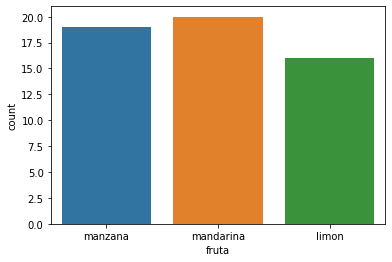

In [8]:
# Se representa graficamente la frecuencia de las frutas
# Esto permite explorar que tan balanceado está el dataset.
# sns, alias de Seaborn
# countplot(), gráfico de barras
# Necesita toda la data
# Se especifica la columna a representar, en este caso "fruta"
sns.countplot(data=df, x="fruta")

# Muestra el gráfico
plt.show()

Se puede ver que el dataset está bastante balanceado, no habrá una tendencia marcada

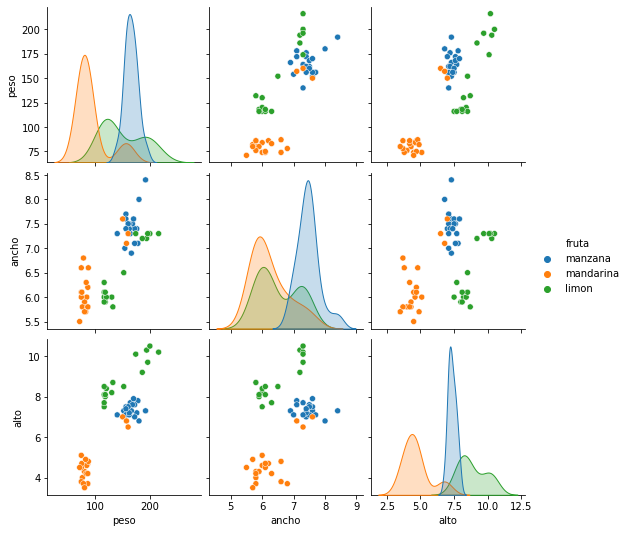

In [9]:
sns.pairplot(df, hue= 'fruta')

In [10]:
# Nos quedamos con aquellas columnas que podemos entender su relacion con el objetivo:
# 'peso', 'ancho', 'alto', 'fruta'
# Para acceder a las columnas mencionadas se accede al DataFrame df[] y como 
# son varias columnas se indican los nombres en una lista
# Almacenandose en el DataFrame df_clean
df_clean = df[['peso', 'ancho', 'alto', 'fruta']]
df_clean.head(10)

,peso,ancho,alto,fruta
0,192,8.4,7.3,manzana
1,180,8.0,6.8,manzana
2,176,7.4,7.2,manzana
3,86,6.2,4.7,mandarina
4,84,6.0,4.6,mandarina
5,80,5.8,4.3,mandarina
6,80,5.9,4.3,mandarina
7,76,5.8,4.0,mandarina
8,178,7.1,7.8,manzana
9,172,7.4,7.0,manzana


#### Normalización de los datos

Analizar cual es la distribución de los datos numéricos
- peso
- ancho
- alto

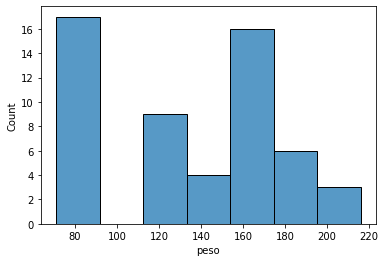

In [11]:
# Se representa graficamente la distribución de los pesos de las frutas
# sns, alias de Seaborn
# displot(), gráfico de distribución
# Necesita toda la data
# Se especifica la columna a representar, en este caso "peso"
sns.histplot(data=df_clean, x='peso')
# Muestra el gráfico
plt.show()

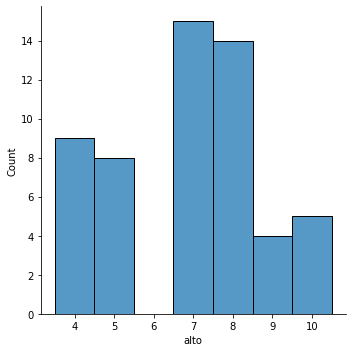

In [12]:
# Se representa graficamente la distribución de los altos de las frutas
# sns, alias de Seaborn
# displot(), gráfico de distribución
# Necesita toda la data
# Se especifica la columna a representar, en este caso "alto"
sns.displot(data=df_clean, x='alto')
# Muestra el gráfico
plt.show()

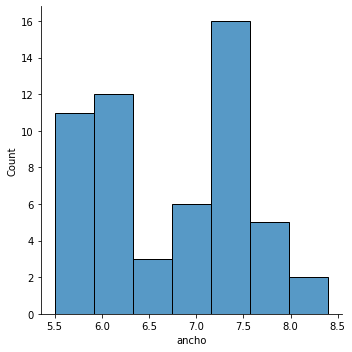

In [13]:
# Se representa graficamente la distribución de los anchos de las frutas
# sns, alias de Seaborn
# displot(), gráfico de distribución
# Necesita toda la data
# Se especifica la columna a representar, en este caso "ancho"
sns.displot(data=df_clean, x='ancho')

# Muestra el gráfico
plt.show()

Se normalizarán los datos de las columnas; peso, ancho y alto, a través del StandardScaler, ya que el rango de datos de cada columna es diferente.

In [14]:
# Normalización de datos
# Se importa la herramienta de sklearn.preprocessing como StandardScaler
from sklearn.preprocessing import StandardScaler

# Se crea una copia del DataFrame df_clean a df_norm
df_norm = df_clean.copy()

# Se crean los objetos; peso_scaler, ancho_scaler y alto_scaler a partir de la clase StandardScaler()
peso_scaler = StandardScaler()
ancho_scaler = StandardScaler()
alto_scaler = StandardScaler()

# Del DataFrame normalizado df_norm se emplea el método .loc para editar los datos de las columnas: peso, ancho e alto 
# Cada columna se completará con los datos normalizados
# Para ello, se utiliza cada objeto creado y accede al método .fit_transform()
# se indica la columna del DataFrame a normalizar 
# Al agregar .values, solo toma los valores, sin nombres de funciones (Los nombres de las columnas).
df_norm.loc[:, 'peso'] = peso_scaler.fit_transform(df[['peso']].values)
df_norm.loc[:, 'ancho'] = ancho_scaler.fit_transform(df[['ancho']].values)
df_norm.loc[:, 'alto'] = alto_scaler.fit_transform(df[['alto']].values)
df_norm.head()

,peso,ancho,alto,fruta
0,1.379058,2.243028,0.254248,manzana
1,1.094716,1.703130,-0.009594,manzana
2,0.999936,0.893284,0.201479,manzana
3,-1.132629,-0.726407,-1.117730,mandarina
4,-1.180019,-0.996356,-1.170499,mandarina


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [16]:
# Obtener los valores de X e y
# En X se almacenarán todos los valores de las columnas excepto los valores de la columna "fruta"
# axis=1 para que se elimine por filas
# En y sólo se almacena los valores de la columna "fruta", que será la columna objetivo.
# Para ello, se accede a la columna "fruta" del DataFrame df_norm usando corchetes.
# En ambos caso, se implementa el método values para obtener solo los valores y que no vengan incluidos
# los nombres de las columnas.
X = df_norm.drop('fruta', axis=1).values
y = df_norm['fruta'].values
X.shape

(55, 3)

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [17]:
# Se importa la herramienta de sklearn.model_selectionl como train_test_split
from sklearn.model_selection import train_test_split

# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
# Ojo! Los dataset de train y test son array numpy
# Se importa la herramienta de la libreria  train_test_split()
# Necesita los valores de X e y
# test_size=0.3, permite indicar el porcentaje de valores para evaluar, equivalente a un 30%
# random_state=42,  es un número fijo que utilizan comunmente en documentación, significa que para cada ejecución del algoritmo 
#se genere nuevos valores aleatorios
# y los conjuntos de datos de entrenamiento y pruebas serán diferentes.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Crear un modelo de clasificación con vecinos cercanos (KNN)



- Armar los grupos de vecinos cercanos basado en la cantidad de frutas
- En este dataset tenemos 3 frutas para separar, veremos si el sistema es capaz se separarlas correctamente
- Armar y entrenar el modelo

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Se entrena el modelo clasificador KNN con el método .fit()
# Como se conoce la cantidad los grupos de frutas, se tiene conocimiento de 
# los tres grupos que existen en el dataset
# Para luego utilizar .predict() a partir de clf
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_hat = clf.predict(X_test)  

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [19]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.9411764705882353

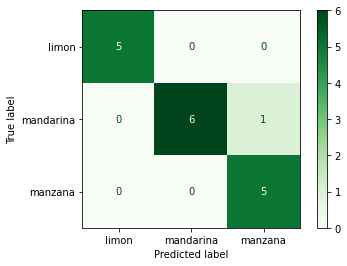

In [20]:
# Se utliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test, y_hat)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix 
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)


# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd.plot(cmap=plt.cm.Greens)

# Para mostrar la figura
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [21]:
# Supongamos que deseamos ver a que categoría que
# pertenece una fruta con las siguientes características
peso = 130 
ancho = 15
alto = 12

In [22]:
# El scaler espera como entrada una matriz (filas y columnas)
# Por eso el doble corchete
peso_numpy = np.array([[peso]])

# Utilizamos float para convertir la matriz que retorna el scaler
# a un número
peseo_norm = float(peso_scaler.transform(peso_numpy))
ancho_norm = float(ancho_scaler.transform(np.array([[ancho]])))
alto_norm = float(alto_scaler.transform(np.array([[alto]])))
# El sistema espera como entrada "X" en este caso una sola fila pero varias
# columnas, por eso el reshape(1, -1) donde el "-1" significa "varias"
# (el sistema determina cuantas)
X_prueba = np.array([peseo_norm, ancho_norm, alto_norm]).reshape(1, -1)
print('Shape:', X_prueba.shape)
print('Valores:\n', X_prueba)

Shape: (1, 3)
Valores:
 [[-0.0900416  11.15133157  2.7343618 ]]


In [23]:
# Se hace la predicción, a partir del objeto clasificador creado "clf"
# Y con el método .predict()
mi_fruta = clf.predict(X_prueba)
mi_fruta

array(['manzana'], dtype=object)

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Se puede ver que el KNN es un algoritmo muy simple y potente cuando los datos son posibles de separar espacialmente. Cuando los datos son más complejos de separar es recomendable utilizar otro algoritmo como el de random forest